<a href="https://colab.research.google.com/github/wuba2010work/CWP/blob/main/seroot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
!pip install rasterio geopandas numpy
import rasterio
import numpy as np
import os
from google.colab import drive
from rasterio.plot import show
import matplotlib.pyplot as plt

In [22]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# Set paths
# Correct path to the DIRECTORY containing your TIFF files
input_dir = '/content/drive/MyDrive/Seroot/'  # Note: ends with slash
os.listdir(input_dir)  # This should now work
output_dir = '/content/drive/MyDrive/Seroot/5day_composites/'
os.makedirs(output_dir, exist_ok=True)

In [25]:
# List files in input directory
print("Contents of input directory:")
files = os.listdir(input_dir)
for file in files:
    print(file)

Contents of input directory:
se_root1.tfw
se_root1.tif.aux.xml
se_root1.tif.ovr
se_root1.tif
5day_composites


In [28]:
# visualizing tiff files only

print("TIFF files in input directory:")
for file in os.listdir(input_dir):
    if file.lower().endswith('.tif') or file.lower().endswith('.tiff'):
        print(file)

TIFF files in input directory:
se_root1.tif


In [26]:
# checking files

print(os.path.isdir('/content/drive/MyDrive/Seroot/'))  # Should be True
print(os.path.isfile('/content/drive/MyDrive/Seroot/se_root1.tif'))  # Should be True

True
True


In [29]:
# list daily data

# Path to your TIFF file
tif_path = '/content/drive/MyDrive/Seroot/se_root1.tif'

# Open the file and inspect bands
with rasterio.open(tif_path) as src:
    print(f"Number of bands: {src.count}")  # Should print 33 if your file has 33 bands
    print(f"Width: {src.width}, Height: {src.height}")
    print(f"CRS (Coordinate Reference System): {src.crs}")
    print(f"Transform (geospatial info): {src.transform}")

    # Optional: Print metadata for each band
    for band_idx in range(1, src.count + 1):
        band = src.read(band_idx)
        print(f"\nBand {band_idx}:")
        print(f"  Shape: {band.shape}")
        print(f"  Min value: {band.min()}")
        print(f"  Max value: {band.max()}")
        print(f"  Data type: {band.dtype}")

Number of bands: 33
Width: 861, Height: 1278
CRS (Coordinate Reference System): None
Transform (geospatial info): | 0.00, 0.00, 40.10|
| 0.00,-0.00, 9.46|
| 0.00, 0.00, 1.00|

Band 1:
  Shape: (1278, 861)
  Min value: -3.4028230607370965e+38
  Max value: 1.0
  Data type: float32

Band 2:
  Shape: (1278, 861)
  Min value: -3.4028230607370965e+38
  Max value: 1.0
  Data type: float32

Band 3:
  Shape: (1278, 861)
  Min value: -3.4028230607370965e+38
  Max value: 1.0
  Data type: float32

Band 4:
  Shape: (1278, 861)
  Min value: -3.4028230607370965e+38
  Max value: 1.0
  Data type: float32

Band 5:
  Shape: (1278, 861)
  Min value: -3.4028230607370965e+38
  Max value: 1.0
  Data type: float32

Band 6:
  Shape: (1278, 861)
  Min value: -3.4028230607370965e+38
  Max value: 1.0
  Data type: float32

Band 7:
  Shape: (1278, 861)
  Min value: -3.4028230607370965e+38
  Max value: 1.0
  Data type: float32

Band 8:
  Shape: (1278, 861)
  Min value: -3.4028230607370965e+38
  Max value: 1.0
  Data

In [34]:
# assign cordinate system
output_path = '/content/drive/MyDrive/Seroot/se_root1_with_crs.tif'

with rasterio.open(tif_path) as src:
    profile = src.profile
    profile.update(crs='EPSG:4326')  # Assign WGS84

    with rasterio.open(output_path, 'w', **profile) as dst:
        dst.write(src.read())  # Copy all bands
print(f"File saved with CRS at: {output_path}")

File saved with CRS at: /content/drive/MyDrive/Seroot/se_root1_with_crs.tif


In [36]:
#checking the coordinate system

with rasterio.open(output_path) as src:
    print("Updated CRS:", src.crs)  # Should now show the assigned CRS
    print("Transform:", src.transform)  # Unchanged

Updated CRS: EPSG:4326
Transform: | 0.00, 0.00, 40.10|
| 0.00,-0.00, 9.46|
| 0.00, 0.00, 1.00|


In [48]:
# checking for 'no value' data
import numpy as np
import rasterio

tif_path = '/content/drive/MyDrive/Seroot/se_root1.tif'

with rasterio.open(tif_path) as src:
    # Read all bands (33 days)
    data = src.read()  # Shape: (33, 1278, 861)

    # Mask NoData values (-3.4e+38)
    masked_data = np.ma.masked_equal(data, -3.4028230607370965e+38)

    # Count valid pixels per band
    valid_pixels_per_band = np.sum(~masked_data.mask, axis=(1, 2))

    # Print results
    for band_idx in range(src.count):
        print(f"Band {band_idx + 1}:")
        print(f"  Valid pixels: {valid_pixels_per_band[band_idx]}")
        print(f"  % Valid data: {100 * valid_pixels_per_band[band_idx] / (src.height * src.width):.2f}%")

    # Total statistics
    print("\nSummary:")
    print(f"Total pixels per band: {src.height * src.width}")
    print(f"Mean % valid data across all bands: {np.mean(valid_pixels_per_band) / (src.height * src.width) * 100:.2f}%")

Band 1:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 2:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 3:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 4:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 5:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 6:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 7:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 8:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 9:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 10:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 11:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 12:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 13:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 14:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 15:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 16:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 17:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 18:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 19:
  Valid pi

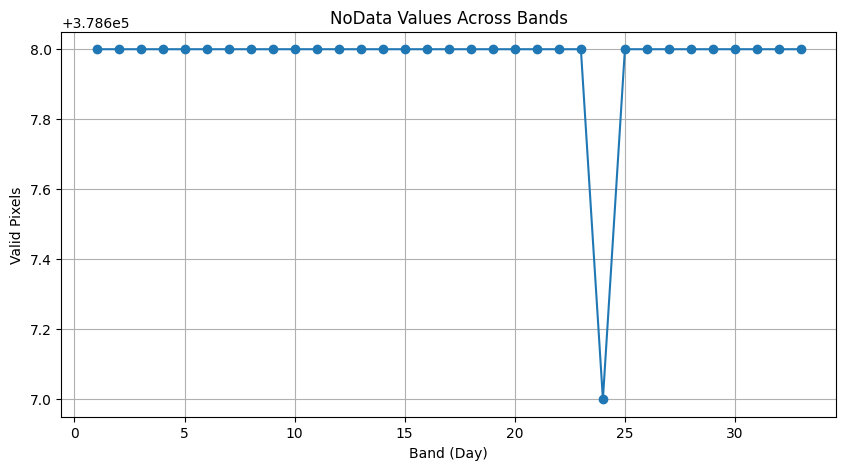

In [49]:
# visualize no data distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, 34), valid_pixels_per_band, 'o-')
plt.xlabel('Band (Day)')
plt.ylabel('Valid Pixels')
plt.title('NoData Values Across Bands')
plt.grid()
plt.show()

In [50]:
# masked no data value of all days

import numpy as np
import rasterio

tif_path = '/content/drive/MyDrive/Seroot/se_root1.tif'

# Open file and mask NoData (-3.4e+38)
with rasterio.open(tif_path) as src:
    data = src.read()  # Shape: (33, 1278, 861)
    masked_data = np.ma.masked_equal(data, -3.4028230607370965e+38)

    # Verify masking worked
    print(f"Masked values count: {np.sum(masked_data.mask)}")
    print(f"Sample masked values: {masked_data[0, 0, 0]}")  # Check first pixel

Masked values count: 23817751
Sample masked values: --


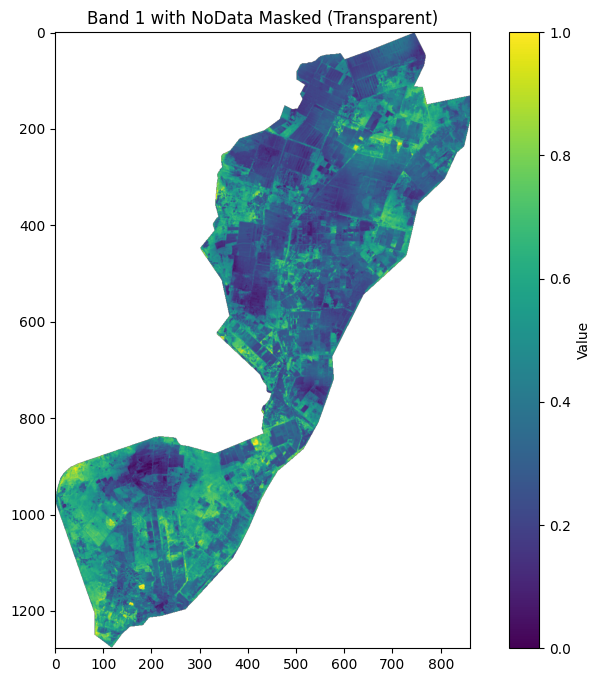

In [51]:
# visualize the masked data
import matplotlib.pyplot as plt

# Plot Band 1 with NoData as transparent
plt.figure(figsize=(10, 8))
plt.imshow(masked_data[0], cmap='viridis', vmin=0, vmax=1)
plt.colorbar(label='Value')
plt.title("Band 1 with NoData Masked (Transparent)")
plt.show()

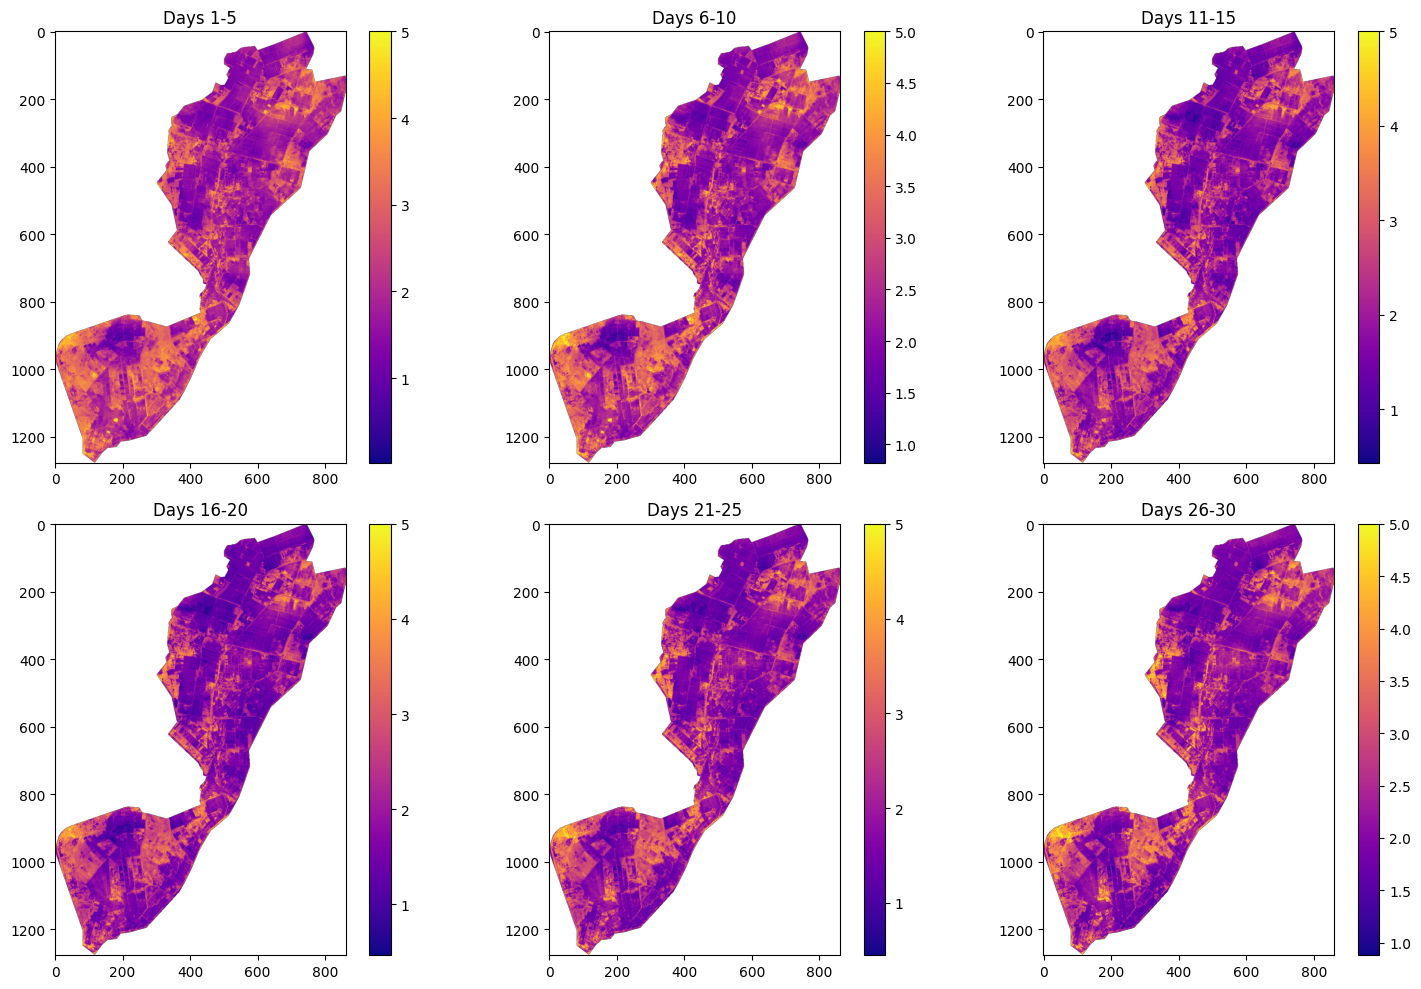

In [52]:
# 5 day temporal resolution with masked data

# Calculate 5-day sums (automatically ignores NoData)
n_composites = 6
sums = np.ma.zeros((n_composites, *masked_data.shape[1:]))

for i in range(n_composites):
    start = i * 5
    end = start + 5
    sums[i] = np.ma.sum(masked_data[start:end], axis=0)

# Visualize
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, ax in enumerate(axes.flat):
    if i < n_composites:
        im = ax.imshow(sums[i], cmap='plasma')
        plt.colorbar(im, ax=ax)
        ax.set_title(f'Days {i*5+1}-{i*5+5}')
plt.tight_layout()

In [53]:
# save the 5 day temporal composite

import numpy as np
import rasterio
from rasterio.transform import Affine

# Input and output paths
input_path = '/content/drive/MyDrive/Seroot/se_root1.tif'
output_path = '/content/drive/MyDrive/Seroot/5day_sums_masked.tif'

# 1. Load and mask the data
with rasterio.open(input_path) as src:
    # Read all bands and mask NoData values
    data = np.ma.masked_equal(src.read(), -3.4028230607370965e+38)
    profile = src.profile.copy()

    # 2. Calculate 5-day sums (automatically ignores NoData)
    n_composites = 6
    sums = np.ma.zeros((n_composites, *data.shape[1:]))

    for i in range(n_composites):
        start = i * 5
        end = start + 5
        sums[i] = np.ma.sum(data[start:end], axis=0)

    # 3. Prepare output file
    profile.update(
        count=n_composites,
        dtype=rasterio.float32,
        nodata=np.nan  # Using NaN as NoData value
    )

    # 4. Save to new GeoTIFF
    with rasterio.open(output_path, 'w', **profile) as dst:
        # Convert masked array to NaN-filled array
        dst.write(np.ma.filled(sums, fill_value=np.nan))

print(f"Successfully saved 5-day sums to: {output_path}")
print(f"File contains {n_composites} bands (each representing 5-day sums)")

Successfully saved 5-day sums to: /content/drive/MyDrive/Seroot/5day_sums_masked.tif
File contains 6 bands (each representing 5-day sums)


<ipython-input-57-f3f433d487b5>:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('viridis')  # Can change to preferred colormap



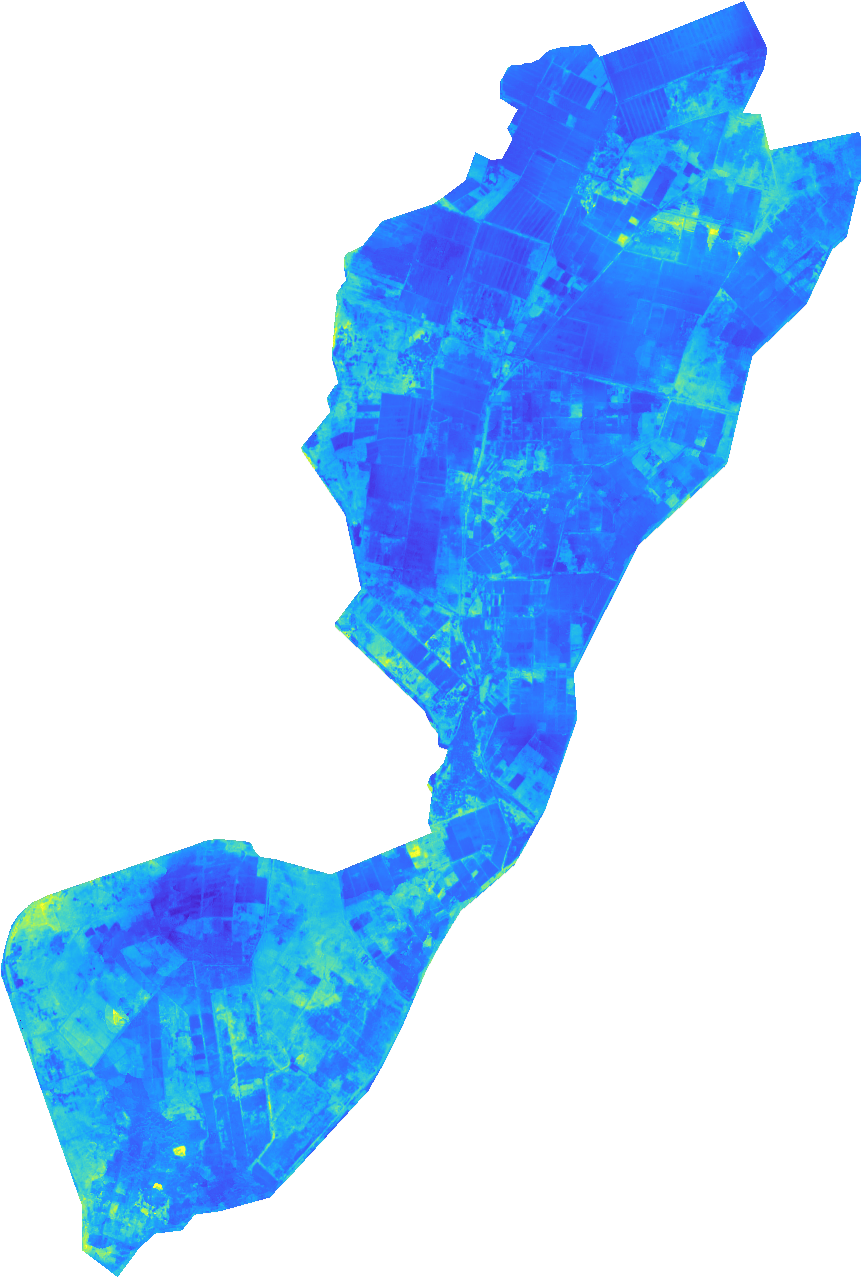
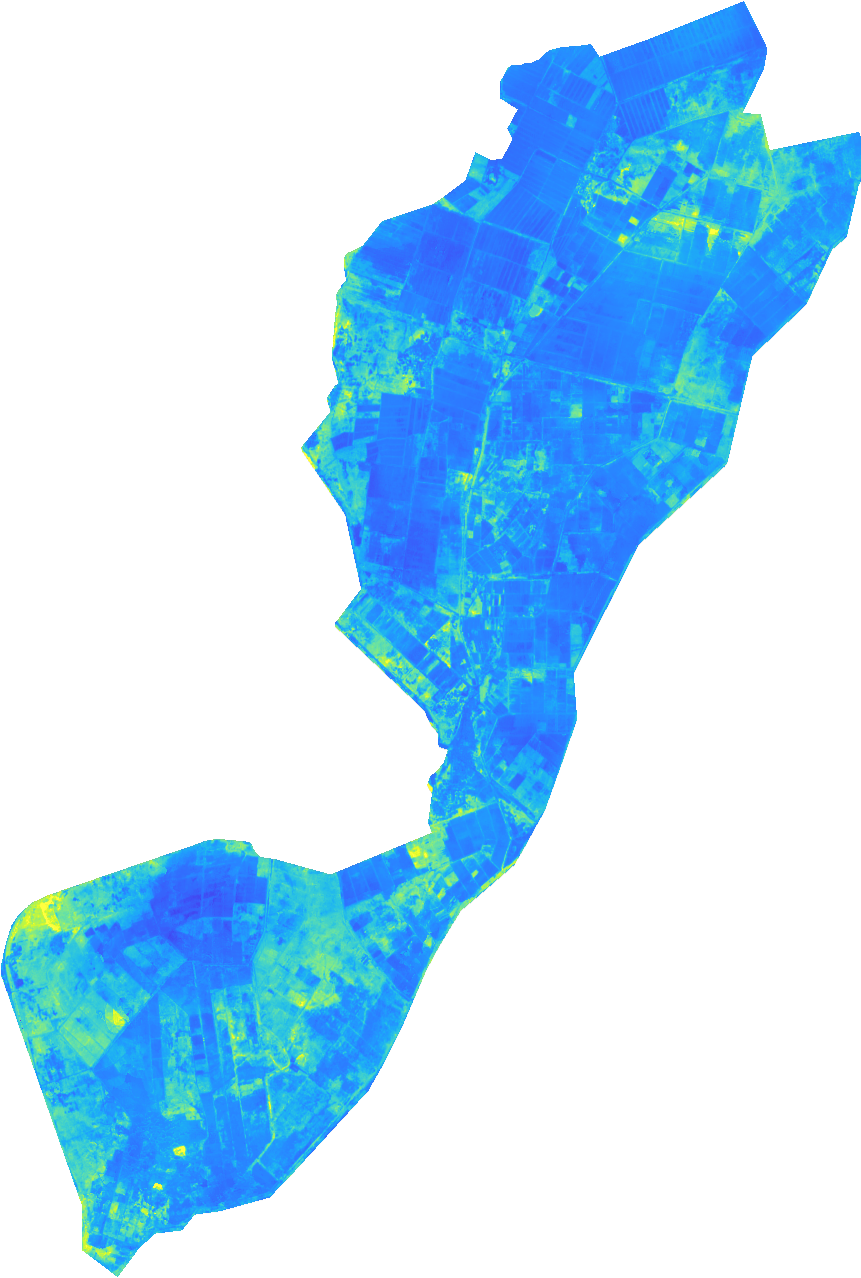
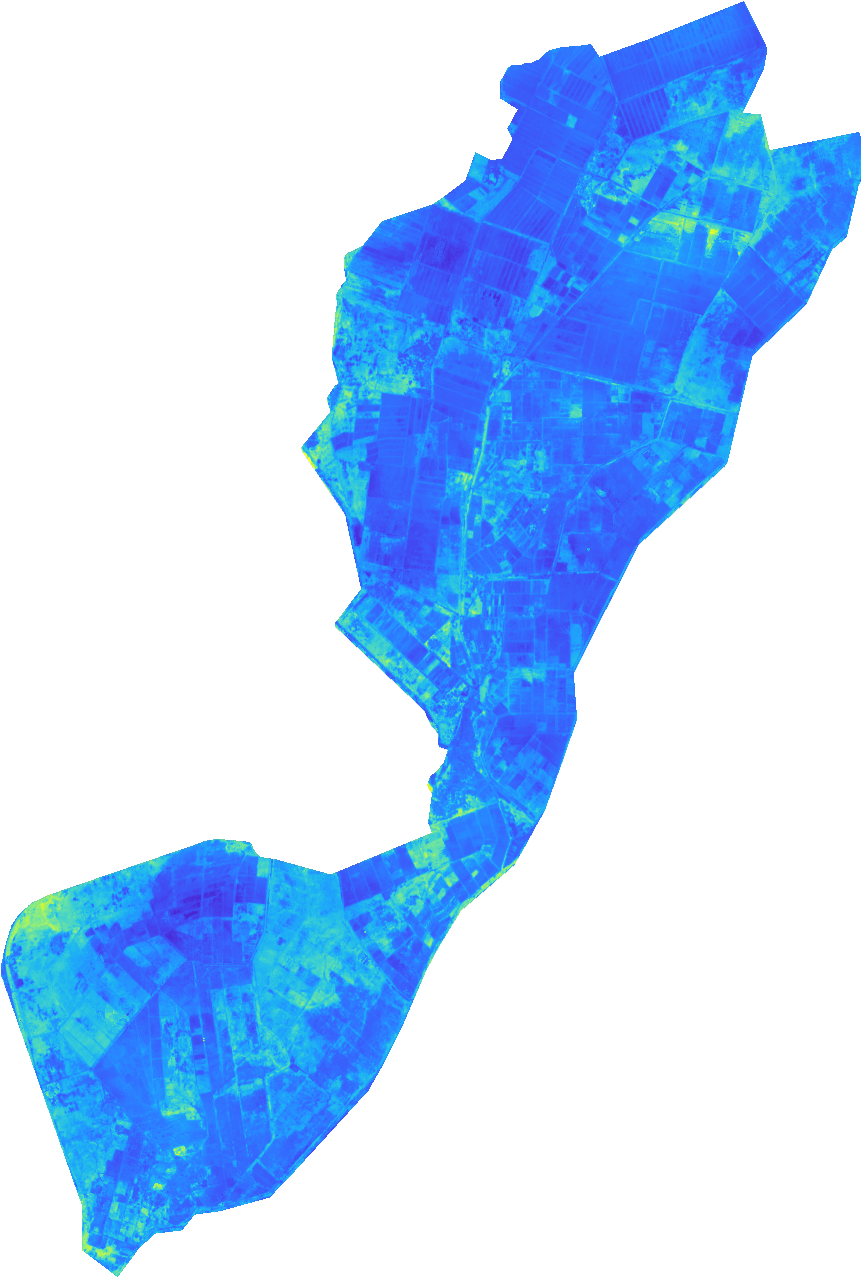
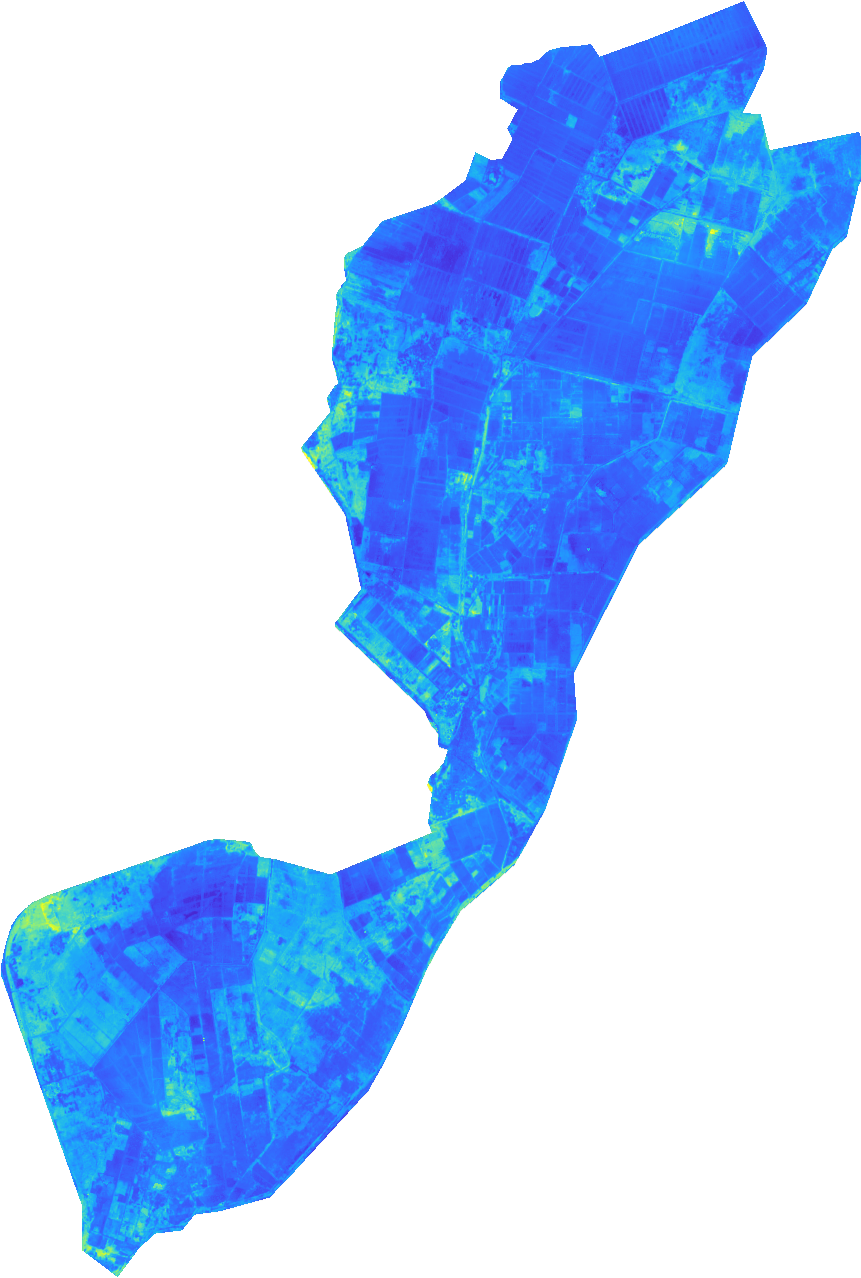
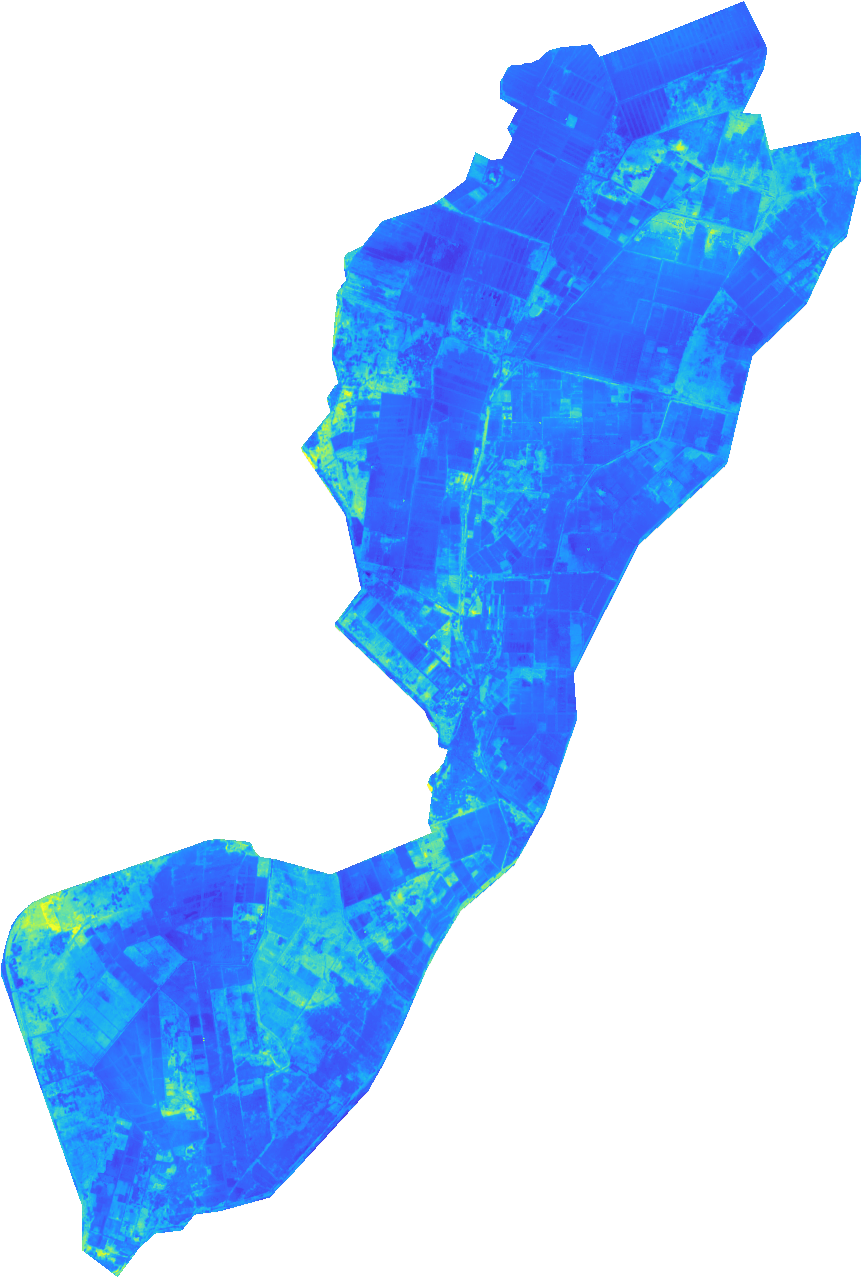
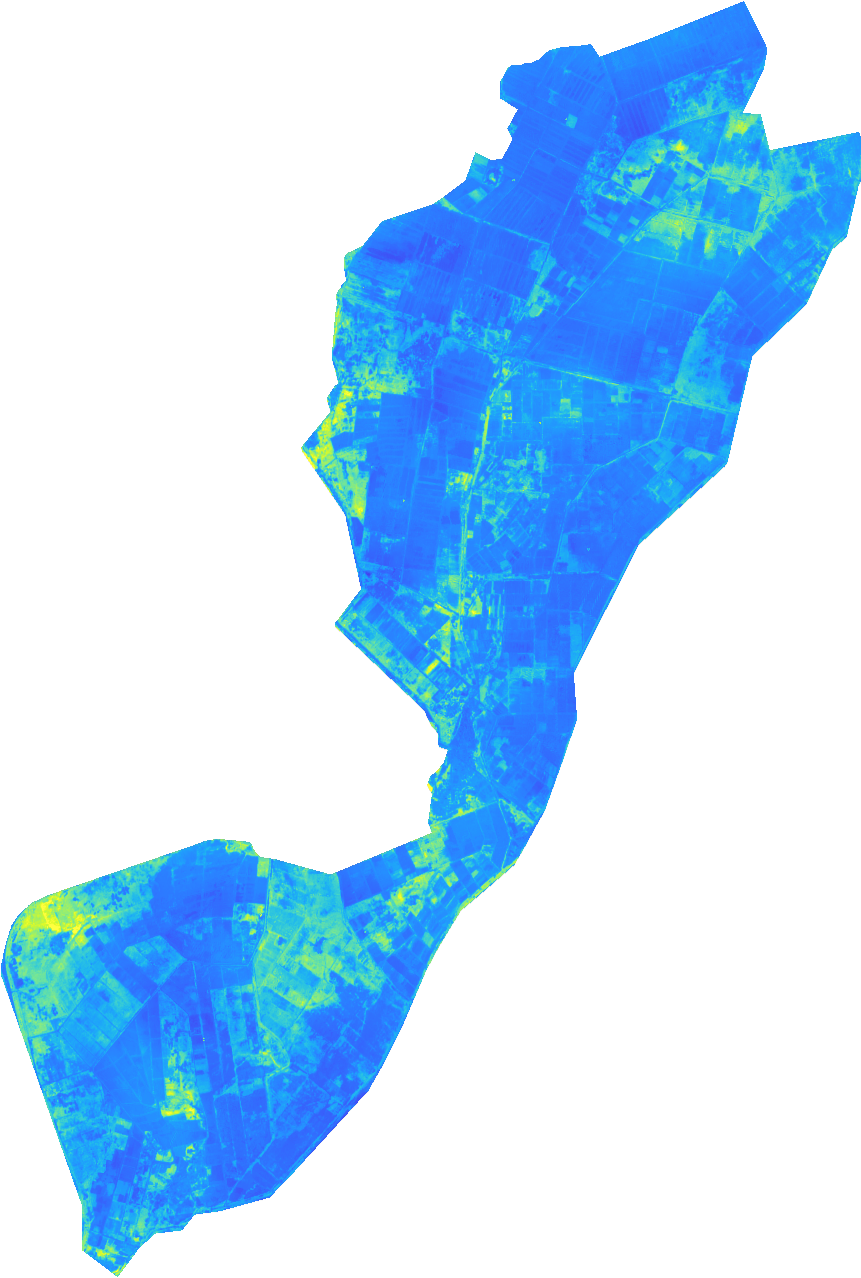

In [57]:
import folium
import rasterio
import numpy as np
from branca.colormap import LinearColormap
from matplotlib.colors import Normalize

# 1. Load and prepare data
sums_path = '/content/drive/MyDrive/Seroot/5day_sums_masked.tif'

with rasterio.open(sums_path) as src:
    bounds = src.bounds
    crs = src.crs or 'EPSG:4326'  # Default to WGS84 if no CRS
    data = src.read(1)  # First band
    valid_data = data[~np.isnan(data)]  # Get only valid values

# 2. Create normalized colormap
vmin, vmax = np.nanmin(data), np.nanmax(data)

# Handle case where all values are equal
if vmin == vmax:
    vmin = vmin - 0.5
    vmax = vmax + 0.5

norm = Normalize(vmin=vmin, vmax=vmax, clip=True)
colormap = LinearColormap(
    ['blue', 'yellow', 'red'],
    vmin=vmin,
    vmax=vmax,
    caption='5-Day Sum Value'
)

# 3. Create base map
m = folium.Map(
    location=[(bounds.top + bounds.bottom)/2, (bounds.left + bounds.right)/2],
    zoom_start=10,
    tiles='CartoDB positron'
)

# 4. Function to convert data to RGBA
def data_to_rgba(data, norm, cmap):
    """Convert data array to RGBA using matplotlib colormap"""
    from matplotlib.cm import get_cmap
    cmap = get_cmap('viridis')  # Can change to preferred colormap
    rgba = cmap(norm(data))
    rgba[..., 3] = np.where(np.isnan(data), 0, 1)  # Transparent for NaN
    return (rgba * 255).astype(np.uint8)

# 5. Add all composites as layers
for i in range(6):
    with rasterio.open(sums_path) as src:
        band_data = src.read(i + 1)

    rgba_data = data_to_rgba(band_data, norm, colormap)

    folium.raster_layers.ImageOverlay(
        image=rgba_data,
        bounds=[[bounds.bottom, bounds.left], [bounds.top, bounds.right]],
        opacity=0.7,
        name=f'Days {i*5+1}-{i*5+5}',
        show=(i == 0),
        mercator_project=True if str(crs) == 'EPSG:4326' else False
    ).add_to(m)

# 6. Add controls
colormap.add_to(m)
folium.LayerControl().add_to(m)

# 7. Display
display(m)
m.save('/content/drive/MyDrive/Seroot/5day_composite_map.html')

In [37]:
# # 5 day temporal resolution by mean

# import numpy as np
# import rasterio
# from rasterio.transform import Affine

# # Input/Output paths
# input_path = '/content/drive/MyDrive/Seroot/se_root1.tif'
# output_path = '/content/drive/MyDrive/Seroot/5day_composites2.tif'

# # Open the input file
# with rasterio.open(input_path) as src:
#     # Read all bands (33 days)
#     data = src.read()  # Shape: (33, 1278, 861)
#     profile = src.profile

#     # Mask NoData values (-3.4e+38)
#     data = np.ma.masked_equal(data, -3.4028230607370965e+38)

#     # Calculate number of 5-day composites (33//5 = 6)
#     n_bands = data.shape[0] // 5
#     composites = np.ma.zeros((n_bands, 1278, 861))

#     # Average every 5 days into a composite band
#     for i in range(n_bands):
#         start = i * 5
#         end = start + 5
#         composite = np.ma.mean(data[start:end], axis=0)
#         composites[i] = composite

#     # Update profile for output
#     profile.update(count=n_bands)

#     # Save the 5-day composites
#     with rasterio.open(output_path, 'w', **profile) as dst:
#         dst.write(composites.filled(-3.4e+38))  # Restore NoData for saved file

# print(f"Saved {n_bands} 5-day composites to {output_path}")

Saved 6 5-day composites to /content/drive/MyDrive/Seroot/5day_composites2.tif


In [18]:
# # time series annotation for multiple composites

# from matplotlib.animation import FuncAnimation
# from IPython.display import HTML

# # Get all composite files
# composite_files = sorted([f for f in os.listdir(output_dir) if f.startswith('5day_sum_')])

# fig, ax = plt.subplots(figsize=(10, 8))
# plt.close()  # Prevent duplicate display

# def update(frame):
#     ax.clear()
#     with rasterio.open(os.path.join(output_dir, composite_files[frame])) as src:
#         data = src.read(1)
#         img = show(src, ax=ax, cmap='YlGnBu')
#         ax.set_title(f'5-Day Sum Composite {frame+1}\n{composite_files[frame]}')
#     return img

# ani = FuncAnimation(fig, update, frames=len(composite_files), interval=1000)
# HTML(ani.to_jshtml())